# Machine Learning Unsupervised

##  K-Means Clustering 

__Goal:__
The purpose of this notebook is to learn how to use an unsupervised learning algorithm, **K-means** using sklearn.   

__At the end of this notebook you will be able to:__
> 1. Run a K-means algorithm.
> 2. Understand how you can configure the algorithm.
> 3. Know how to determine the optimal number of clusters.
> 4. Understand difference between inertia and distortion.
> 5. Know the advantages and disadvantages of the algorithm.

### K-Means Overview

**K-means** clustering is one of the simplest and popular unsupervised machine learning algorithms. K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible based on minimizing the sum of squared errors between each datapoint and its cluster center. One of the limitations is that it depends on the starting point of the clusters, and the number of clusters need to be defined beforehand.

In [174]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
import matplotlib.colors as mcolors

In [175]:
# helper function to color clusters
plt.rcParams['figure.figsize'] = [8,8]
def display_cluster(X,km,num_clusters, ax=plt):
    """
    function that plot the clusters by giving each datapoint in the cluster a color 
    and furthermore the centroid of the cluster is plotted
    parameters
    X: input matrix with features and observations
    km: fitted model with the labels for each datapoint and the centroids (km.labels_, km.centers_)
    num_clusters: the number of clusters to display
    ax: either plot or subplot location
    """
    #color = 'brgcmkyw'
    color = list(mcolors.TABLEAU_COLORS.values())
    for i in range(num_clusters):
        #plot the datapoints in the color of the label
        ax.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = 0.4, s = 10)
        #plot the centroid
        ax.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], 
                    marker = '^', s = 300, alpha = 1)

# Generate sample data

First we are going to generate some sample data for demonstration purpose. We will create a dataset with two features `n_features=2` and 1000 observations `n_samples = 1000`

In [176]:
n_samples = 1000
n_bins = 4  
centers = [(-2, -2), (0, 4), (5, 3), (7, 6)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

In [177]:
print(X.shape)
print(X)

(1000, 2)
[[-1.50328585 -2.1382643 ]
 [-1.35231146 -0.47697014]
 [-2.23415337 -2.23413696]
 ...
 [ 7.35144821  7.07015024]
 [ 6.97347874  5.11812535]
 [ 6.83693304  5.25509736]]


Next we plot feature 1 against feature 2

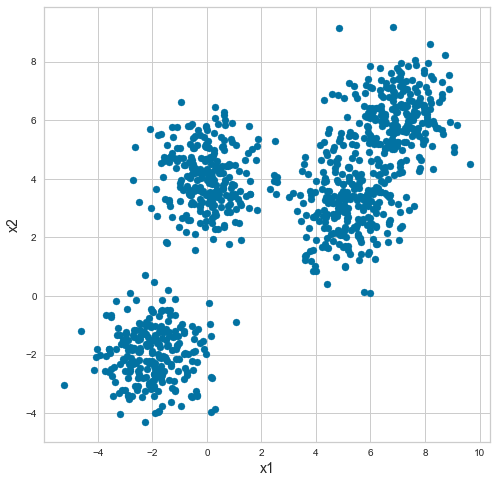

In [178]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X[:,0],X[:,1])
ax.set_xlabel('x1', fontsize=14)
ax.set_ylabel('x2', fontsize=14)
plt.show()

# Question 
How many clusters do you observe?

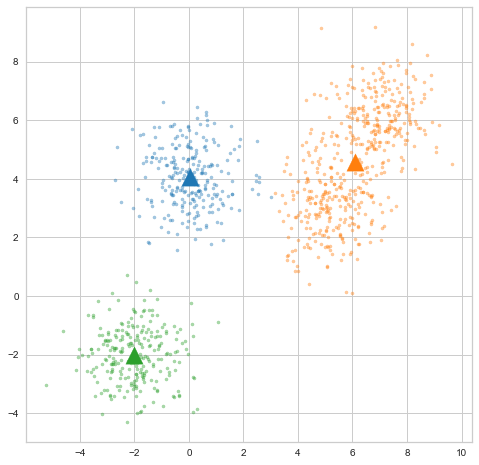

In [179]:
#Let's run K-means with 3 clusters.
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

# Exercise

- Use the display_cluster function to plot the number of clusters for 3, 4, 5, and 6 clusters
- what would be the ideal clustersize?
- In case of 6 clusters. Can you explain from the principle of the algorithm why it seems to split a cluster in half?
- Run the 6 clusters multiple times (about 9 times). It seems that assigns the clusters differently sometimes. Can you explain this by the principle of the algoritm? Try the `init` parameter. How does it change? How about the random_state?

### `init='k-means++'`

The k-means++ initialization picks a random centroid, then picks the next centroid with a probability distance far away from the first

$$\frac{(x_1)^2}{\sum_{i=1}^{n} distance(prevcentroid, x_i) ^2}$$


# Elbow method

In this case we used only two features, which is easy to visualize. In the real world we cannot view data with multiple features. A dataset with a higher dimensional space is hard to visualize. We can solve this with the elbow method, which plots the  **inertia** or the **distortion** as a function of the number of clusters. **inertia** is the output of the KMeans class, for the distortion we need the `KElbowVisualizer`


- inertia = $\sum_{i=1}^{n} (x_i - C_k)^2$ (sensative to number of points in cluster)
- distortion = $\frac{1}{n}\sum_{i=1}^{n} (x_i - C_k)^2$ (less sensative to number of points in cluster)

In [126]:
km.inertia_ #sum of squared error between each point and its cluster center

3481.057632844728

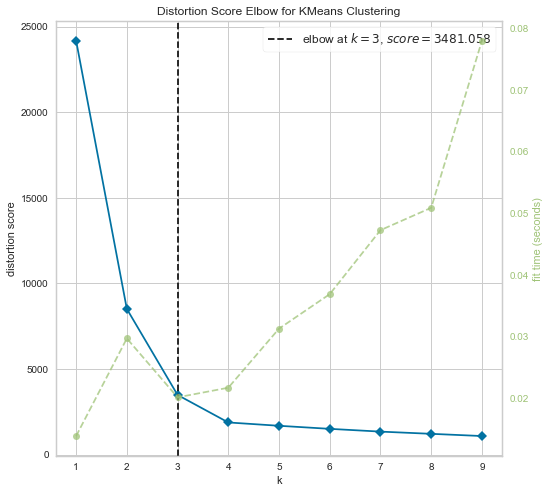

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [185]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(km, k=(1,10))
visualizer.fit(X)
visualizer.show()

## Note

when the inflection point is unclear use the silhouette method instead of distortion

# Exercise

Plot the inertia from number of clusters 1 to 10.
How does it differ from the distortion?
Can you explain the difference or it's similarity by it's formula?

# Exercise
In case of large amount of data and clusters we can use minibatch. Try the difference in kmeans and kmeansminibatch

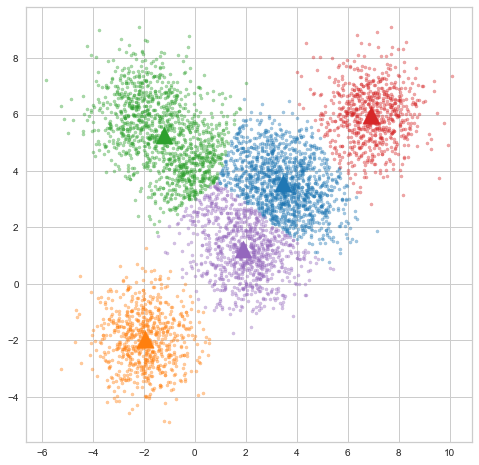

In [188]:
## Large amount of data
n_samples = 5000
n_bins = 10
centers = [(-2, -2), (0, 4), (4, 3), (7, 6), (3, 4), (-2, 6), (2, 1)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
num_clusters = 5
km = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
km.fit(X)
display_cluster(X,km,num_clusters)

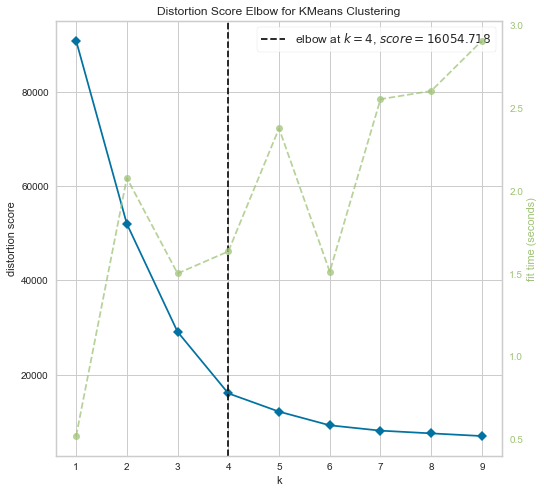

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [189]:
visualizer = KElbowVisualizer(km, k=(1,10))
visualizer.fit(X)
visualizer.show()

In [2]:
from sklearn.cluster import MiniBatchKMeans
#your code here


# Exercise: Assess accuracy of k-means using your own data
We can assess the labeling of k-means by comparing it with the labels from the original dataset
load a dataset with labels (see function below). Use the X matrix and the elbow method to choose the right amount of clusters. Fit the KMeans model and compare `labels_` of the model with the original labels. Use either your own dataset or the iris dataset. Make sure that you use numerical data. If you have categorical data you can encode them to numerical with the labelEncder `from sklearn.preprocessing import LabelEncoder`. NB: Make sure that you do proper preprocessing!

In [3]:
def calc_accuracy(km, y):
    correct_labels = sum(y == km.labels_)
    print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
    print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))